In [14]:
#plotokra 
import matplotlib.pyplot as plt

In [2]:
#linear discriminant analysis

In [15]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
#Splitting the data into 70% training and 30% test subsets.
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [18]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
#Calculate the mean vectors for each class:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [20]:
#Compute the within-class scatter matrix:
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix: 13x13


In [21]:
#Better: covariance matrix since classes are not equally distributed:
print('Class label distribution:', np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [22]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
    
print('Scaled within-class scatter matrix: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Scaled within-class scatter matrix: 13x13


In [23]:
print(S_W)

[[ 1.2448  0.0967 -0.1276 -0.1105 -0.0726  0.2374  0.0753  0.0231  0.1102
   0.4261  0.1411 -0.0155  0.1224]
 [ 0.0967  2.2666  0.1168  0.3517 -0.2622 -0.0467 -0.0186  0.2194  0.0187
  -0.3939 -0.4167  0.0787 -0.2492]
 [-0.1276  0.1168  2.6024  1.6442  0.5364  0.3947  0.3191  0.4553 -0.0353
   0.06    0.167   0.1987 -0.0081]
 [-0.1105  0.3517  1.6442  2.1604  0.325   0.1535  0.1222  0.273  -0.0824
  -0.068   0.0336  0.2548 -0.1201]
 [-0.0726 -0.2622  0.5364  0.325   2.4397  0.2384  0.1433 -0.5166  0.2566
   0.1445  0.1777 -0.0058  0.2509]
 [ 0.2374 -0.0467  0.3947  0.1535  0.2384  1.352   0.6416 -0.0781  0.7644
   0.4392  0.0177  0.4359  0.1554]
 [ 0.0753 -0.0186  0.3191  0.1222  0.1433  0.6416  0.6968 -0.2588  0.5765
   0.3851 -0.0408  0.2525  0.0748]
 [ 0.0231  0.2194  0.4553  0.273  -0.5166 -0.0781 -0.2588  2.1795 -0.2801
  -0.0363  0.1208 -0.332  -0.1485]
 [ 0.1102  0.0187 -0.0353 -0.0824  0.2566  0.7644  0.5765 -0.2801  2.1792
   0.6795 -0.1815  0.2323  0.1568]
 [ 0.4261 -0.3939  

In [24]:
#Compute the between-class scatter matrix:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # make column vector

d = 13  # number of features
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


In [12]:
osszeadas(1, 3)

NameError: name 'osszeadas' is not defined

In [ ]:
import proba

In [ ]:
osszeadas(1, 3)

NameError: name 'osszeadas' is not defined

In [ ]:
import proba *

SyntaxError: invalid syntax (255132530.py, line 1)

In [ ]:
osszeadas(1, 3)

4


In [25]:
#solving the generalized eigenvalue problem for Sw(-1).Sb
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [26]:
eigen_vals

array([ 0.0000e+00+0.0000e+00j,  1.7276e+02+0.0000e+00j,
        3.4962e+02+0.0000e+00j, -1.8030e-14+2.6690e-14j,
       -1.8030e-14-2.6690e-14j,  2.6107e-14+0.0000e+00j,
       -1.2241e-14+1.1853e-14j, -1.2241e-14-1.1853e-14j,
        9.0523e-16+1.6851e-14j,  9.0523e-16-1.6851e-14j,
        7.5850e-15+0.0000e+00j, -2.3734e-15+1.7372e-15j,
       -2.3734e-15-1.7372e-15j])

In [ ]:
%%capture #output supress
eigen_vecs

In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.61780890599397
172.76152218979385
3.2209587419662555e-14
3.2209587419662555e-14
2.6106523402387364e-14
1.7038977764581827e-14
1.7038977764581827e-14
1.687554433463065e-14
1.687554433463065e-14
7.584950171788759e-15
2.9412105155181146e-15
2.9412105155181146e-15
0.0


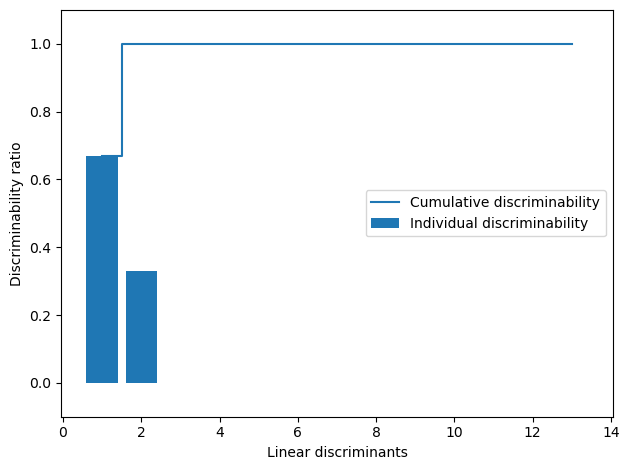

In [28]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, align='center',
        label='Individual discriminability')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative discriminability')
plt.ylabel('Discriminability ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/05_07.png', dpi=300)
plt.show()

In [29]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


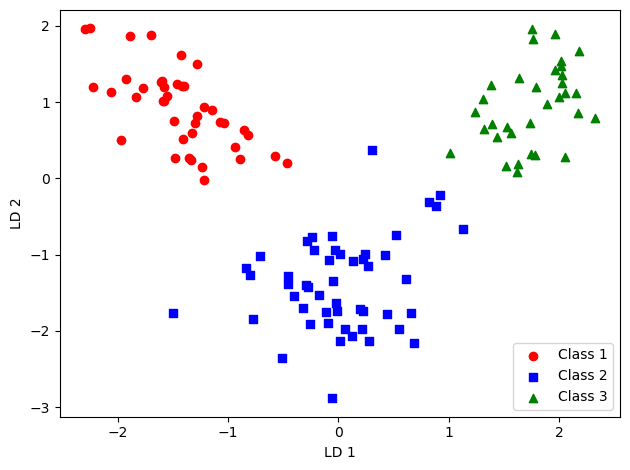

In [30]:
#Projecting examples onto the new feature space
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=f'Class {l}', marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('figures/05_08.png', dpi=300)
plt.show()

In [31]:
#scikit learnben
from plot_help import plot_decision_regions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

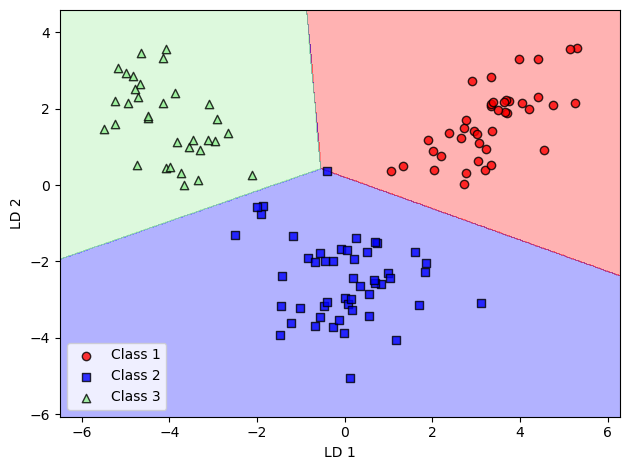

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()